In [2]:
import pandas as pd
import os
import numpy as np
import glob
new_df = []
path1 = ['C:\CassFlipkratScrappingProject\S1_Dataset','C:\CassFlipkratScrappingProject\S2_Dataset']

var = []
j = 0
tst1 = []
tst3 = pd.DataFrame()
for  path2 in path1:
    A = (os.listdir(path2))
    for i in A:

        j = j + 1
        #print(i)
        if i != 'README.txt':
    #tst1.append(['a','b','c','d','e','f','g','h','i'])
            cols = ['Time', 'Acceler_Front', 'Acceler_Vert', 'Acceler_later', 'Id_sensor', 'RSSI', 'Phase', 'Frequency', 'Label']
            tst1.append(pd.read_csv(os.path.join(path2,i),sep=',',names=cols))
    #print(tst1)

       #print(tst1.isnull().sum())
       #print(tst1.head(5))

A = pd.concat(tst1,ignore_index=False)
df = pd.DataFrame(A)
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)

In [3]:
df.tail(5)

Time  Acceler_Front  Acceler_Vert  Acceler_later  Id_sensor  RSSI  \
75123  444.00        0.90520       0.64076      -0.082102          1 -59.5   
75124  449.00        0.90520       0.64076      -0.082102          1 -59.0   
75125  451.50        0.42446       0.91636      -0.161920          1 -53.0   
75126  451.58        0.42446       0.91636      -0.161920          1 -52.0   
75127  452.25        0.58862       0.87042      -0.082102          1 -60.0   

        Phase  Frequency  Label  
75123  1.9574     922.25      2  
75124  6.2540     922.25      2  
75125  5.7156     922.25      4  
75126  5.8982     922.25      4  
75127  5.7033     925.75      4

In [4]:
df.columns





Index(['Time', 'Acceler_Front', 'Acceler_Vert', 'Acceler_later', 'Id_sensor',
       'RSSI', 'Phase', 'Frequency', 'Label'],
      dtype='object')

In [5]:
df.shape

(75128, 9)

In [6]:
df.isnull().sum()

Time             0
Acceler_Front    0
Acceler_Vert     0
Acceler_later    0
Id_sensor        0
RSSI             0
Phase            0
Frequency        0
Label            0
dtype: int64

In [7]:
import pandas as pd
import os
import csv
import numpy as np
import glob
from csv import reader
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score



In [8]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

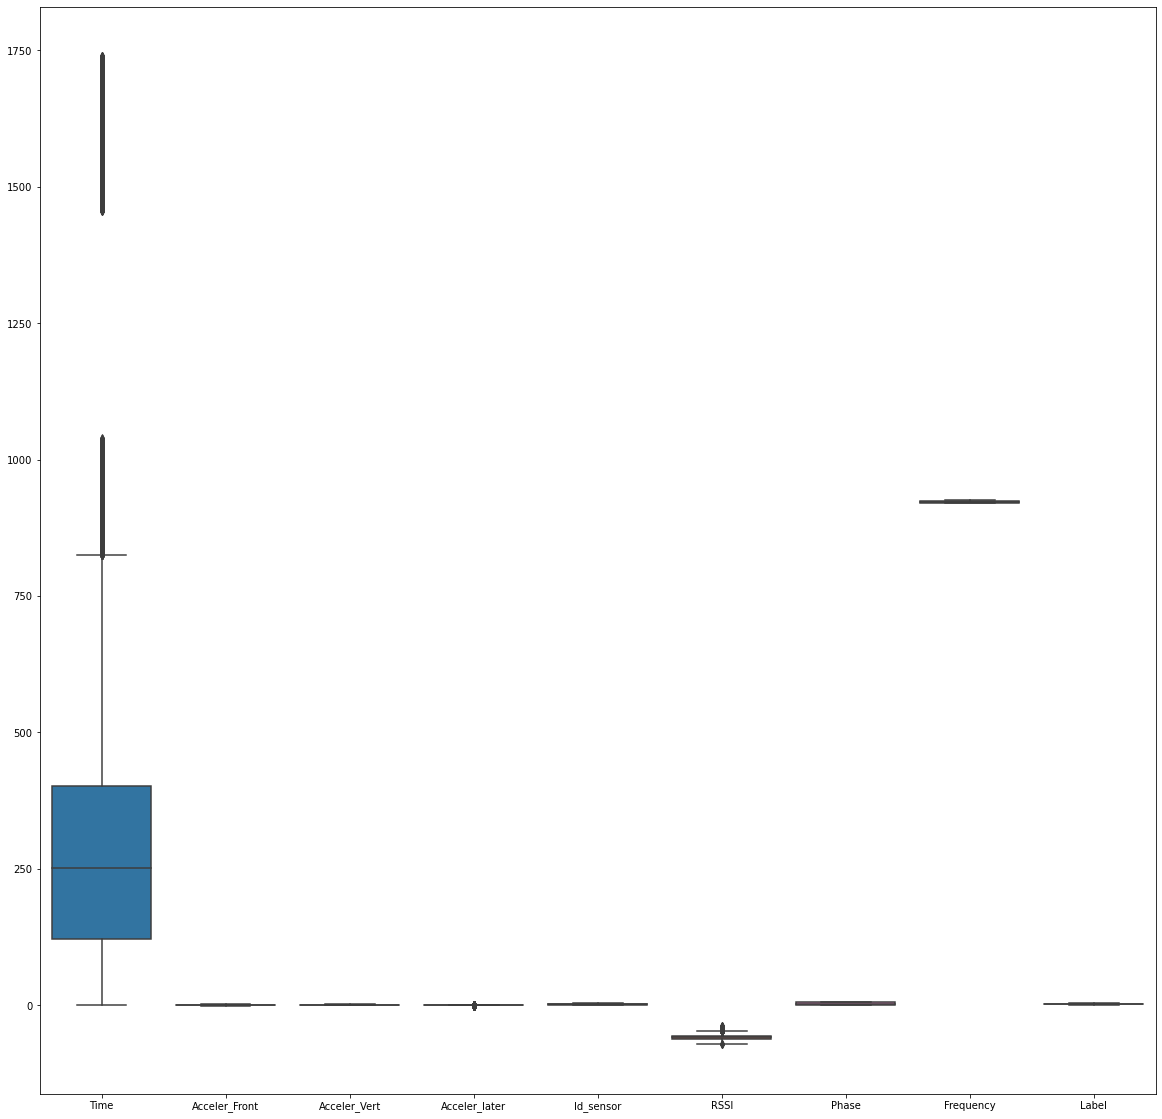

In [9]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

In [10]:
df.dtypes

Time             float64
Acceler_Front    float64
Acceler_Vert     float64
Acceler_later    float64
Id_sensor          int64
RSSI             float64
Phase            float64
Frequency        float64
Label              int64
dtype: object

In [11]:
data = df.copy()

In [12]:
y = data['Label']
X = data.drop(columns=['Label'])

In [13]:
X

Time  Acceler_Front  Acceler_Vert  Acceler_later  Id_sensor  RSSI  \
0        0.00        0.27203       1.00820      -0.082102          1 -63.5   
1        0.50        0.27203       1.00820      -0.082102          1 -63.0   
2        1.50        0.44791       0.91636      -0.013684          1 -63.5   
3        1.75        0.44791       0.91636      -0.013684          1 -63.0   
4        2.50        0.34238       0.96229      -0.059296          1 -63.5   
...       ...            ...           ...            ...        ...   ...   
75123  444.00        0.90520       0.64076      -0.082102          1 -59.5   
75124  449.00        0.90520       0.64076      -0.082102          1 -59.0   
75125  451.50        0.42446       0.91636      -0.161920          1 -53.0   
75126  451.58        0.42446       0.91636      -0.161920          1 -52.0   
75127  452.25        0.58862       0.87042      -0.082102          1 -60.0   

        Phase  Frequency  
0      2.4252     924.25  
1      4.7369     921.75  
2      3.0311     923.75  
3      2.0371     921.25  
4      5.8920     920.25  
...       ...        ...  
75123  1.9574     922.25  
75124  6.2540     922.25  
75125  5.7156     922.25  
75126  5.8982     922.25  
75127  5.7033     925.75  

[75128 rows x 8 columns]

In [14]:
y

0        1
1        1
2        1
3        1
4        1
        ..
75123    2
75124    2
75125    4
75126    4
75127    4
Name: Label, Length: 75128, dtype: int64

In [15]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [16]:
vif_score(X)

FEATURE  VIF_SCORE
0           Time   1.238619
1  Acceler_Front   4.394260
2   Acceler_Vert   4.062640
3  Acceler_later   2.129413
4      Id_sensor   1.136920
5           RSSI   1.110834
6          Phase   1.008645
7      Frequency   1.046643

In [17]:
scalar = StandardScaler()
#ProfileReport(pd.DataFrame(scalar.fit_transform(X)))
X_scaled = scalar.fit_transform(X)

In [18]:
ProfileReport(pd.DataFrame(scalar.fit_transform(X)))

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

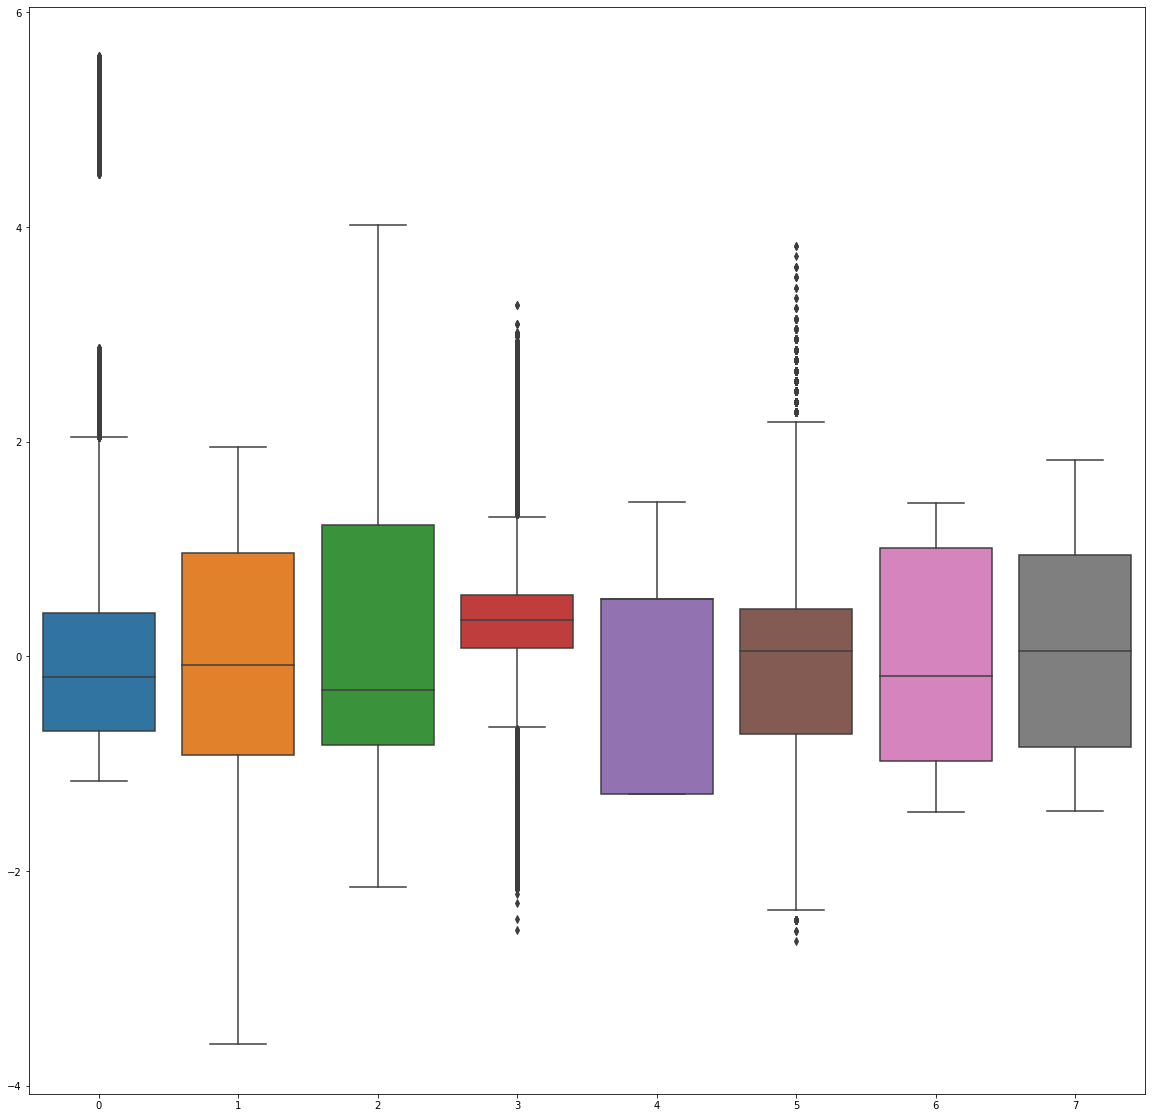

In [19]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = X_scaled , ax = ax)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled , y , test_size = .20 , random_state = 144)

In [21]:
log_clf = LogisticRegression(multi_class='ovr')

In [22]:

log_clf.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [23]:

y_pred = log_clf.predict(x_test)
y_pred

array([3, 1, 1, ..., 1, 3, 1], dtype=int64)

In [24]:
y_decision_val = log_clf.decision_function(x_test)
y_decision_val

array([[ -5.73378147,  -6.85860657,  11.02528358, -10.49836113],
       [  0.70661987,  -1.75397212, -11.54328245,  -2.37584541],
       [  1.09442397,  -1.67075008, -11.70540846,  -2.7488326 ],
       ...,
       [  1.41004207,  -2.18380962, -11.78208016,  -2.53878227],
       [ -4.79803421,  -7.32579231,  10.58488015, -12.17397403],
       [  1.75679314,  -2.29748726, -12.00032311,  -2.19799962]])

In [25]:
y_test

27584    3
17816    4
22417    1
33753    1
5816     3
        ..
16729    1
18338    3
27209    1
60247    3
24425    1
Name: Label, Length: 15026, dtype: int64

In [26]:

y_train_pred = cross_val_predict(log_clf,x_train,y_train,cv=4,verbose=1)
y_train_pred
conf_mx = confusion_matrix(y_test,y_pred)
conf_mx

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s finished


array([[ 3130,    71,    79,     1],
       [  715,   231,     0,     2],
       [    6,     0, 10327,     0],
       [  294,    17,     3,   150]], dtype=int64)

In [27]:
metric =  classification_report(y_test,y_pred)
metric

'              precision    recall  f1-score   support\n\n           1       0.76      0.95      0.84      3281\n           2       0.72      0.24      0.36       948\n           3       0.99      1.00      1.00     10333\n           4       0.98      0.32      0.49       464\n\n    accuracy                           0.92     15026\n   macro avg       0.86      0.63      0.67     15026\nweighted avg       0.92      0.92      0.91     15026\n'

In [28]:
#Book


In [29]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred,average='macro')

0.8629447371156763

In [30]:
recall_score(y_test,y_pred,average='macro')

0.6300858825382929

In [31]:
f1_score(y_test,y_pred,average='macro')

0.6724015142976407

In [32]:
y_pred_prob = log_clf.predict_proba(x_test)
y_pred_prob

array([[3.21063392e-03, 1.04479749e-03, 9.95717105e-01, 2.74631755e-05],
       [7.42209507e-01, 1.63533311e-01, 1.07519704e-05, 9.42464300e-02],
       [7.74222069e-01, 1.63608943e-01, 8.52436142e-06, 6.21604641e-02],
       ...,
       [8.21703978e-01, 1.03471825e-01, 7.81063762e-06, 7.48163858e-02],
       [8.10702768e-03, 6.52155147e-04, 9.91235699e-01, 5.11794877e-06],
       [8.16806607e-01, 8.74757622e-02, 5.88289938e-06, 9.57117479e-02]])

In [33]:
auc = roc_auc_score(y_test,y_pred_prob,average='weighted',multi_class='ovr')
auc

0.9864905614401425

C:\Users\Ragu\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


{0: array([0.00000000e+00, 6.65513111e-05, 1.00000000e+00]), 1: array([0.00000000e+00, 8.51426139e-05, 8.51426139e-05, ...,
       9.86717752e-01, 9.86717752e-01, 1.00000000e+00]), 2: array([0.00000000e+00, 7.10328172e-05, 7.41511578e-01, ...,
       9.99786902e-01, 9.99786902e-01, 1.00000000e+00]), 3: array([0.00000000e+00, 2.13083316e-04, 1.06754741e-01, 1.06754741e-01,
       2.69550394e-01, 2.69550394e-01, 6.31578947e-01, 6.31578947e-01,
       7.17238440e-01, 7.17238440e-01, 7.35137439e-01, 7.35137439e-01,
       7.43660771e-01, 7.43660771e-01, 7.44086938e-01, 7.44086938e-01,
       7.54101854e-01, 7.54101854e-01, 7.55806520e-01, 7.55806520e-01,
       7.63051353e-01, 7.63051353e-01, 7.71574686e-01, 7.71574686e-01,
       7.84785851e-01, 7.84785851e-01, 7.90539101e-01, 7.90539101e-01,
       7.96292350e-01, 7.96292350e-01, 7.99275517e-01, 7.99275517e-01,
       7.99488600e-01, 7.99488600e-01, 7.99701683e-01, 7.99701683e-01,
       8.02258683e-01, 8.02258683e-01, 8.07159599e-01, 8.

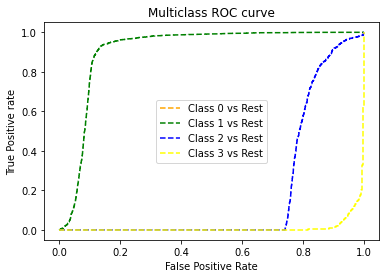

In [34]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 4
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,y_pred_prob[:,i], pos_label=i)
print(fpr,tpr,thresh)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)


In [35]:
y_test.value_counts()

3    10333
1     3281
2      948
4      464
Name: Label, dtype: int64

In [36]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred,digits=4))

[[ 3130    71    79     1]
 [  715   231     0     2]
 [    6     0 10327     0]
 [  294    17     3   150]]
              precision    recall  f1-score   support

           1     0.7551    0.9540    0.8430      3281
           2     0.7241    0.2437    0.3646       948
           3     0.9921    0.9994    0.9958     10333
           4     0.9804    0.3233    0.4862       464

    accuracy                         0.9209     15026
   macro avg     0.8629    0.6301    0.6724     15026
weighted avg     0.9231    0.9209    0.9068     15026



In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.model_selection import train_test_split , GridSearchCV

In [38]:
X1 = df.head(600)

In [39]:
X1.tail()

Time  Acceler_Front  Acceler_Vert  Acceler_later  Id_sensor  RSSI  \
595  243.25        0.22513       1.00820      -0.116310          2 -47.0   
596  243.33        0.24858       1.00820      -0.104910          2 -51.0   
597  243.50        0.24858       1.00820      -0.104910          2 -47.5   
598  243.58        0.21340       1.01970      -0.104910          2 -48.0   
599  243.63        0.36583       0.98526      -0.025087          2 -49.0   

       Phase  Frequency  Label  
595  1.78100     921.25      4  
596  0.21476     925.25      4  
597  2.41910     920.75      4  
598  2.54490     920.75      4  
599  1.09680     924.25      4

In [40]:
X11 =  X1.iloc[:,:-1]
y11 =  X1.iloc[:,-1:]


In [41]:
x11_train, x11_test, y11_train, y11_test = train_test_split(X , y , test_size = .20 , random_state = 144)

In [42]:
model2 = DecisionTreeClassifier()

In [43]:
model2.fit(X11,y11)

DecisionTreeClassifier()

In [44]:
model2.predict(x11_test)

array([3, 4, 1, ..., 1, 3, 1], dtype=int64)

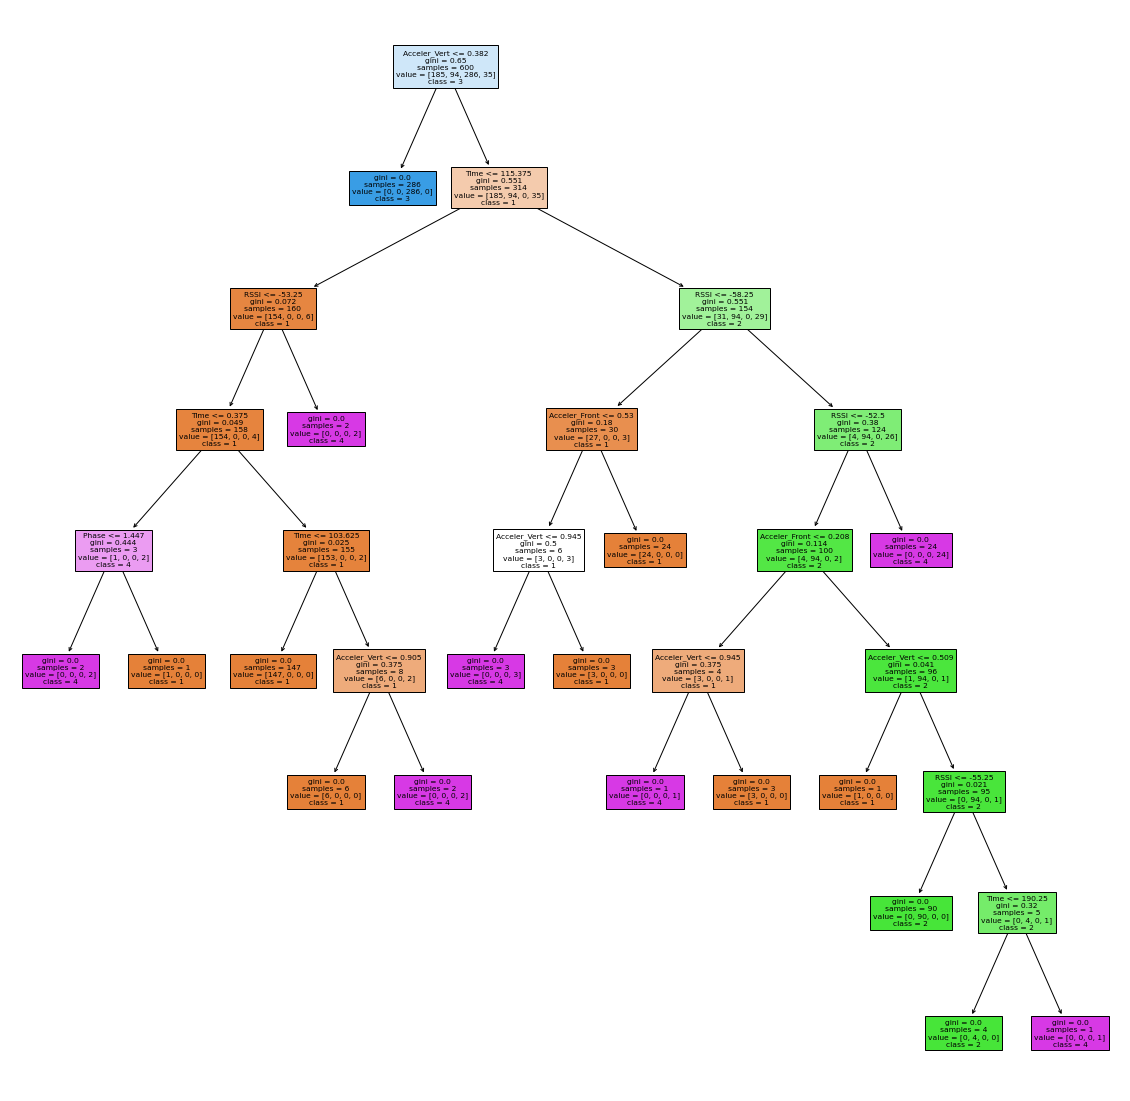

In [45]:
plt.figure(figsize=(20,20))
tree.plot_tree(model2,filled=True, class_names=[str(i) for i in set(y)] ,feature_names=X.columns)
plt.savefig('dt_model_1')

In [46]:
model2.score(X11,y11)

1.0

In [47]:
model2.score(x11_test,y11_test)

0.8385465193664315

In [56]:
check_targets = pd.DataFrame({'predict': model2.predict(x11_test),'actual': y11_test})
check_targets.head()

predict  actual
27584        3       3
17816        4       4
22417        1       1
33753        4       1
5816         3       3

In [57]:
path = model2.cost_complexity_pruning_path(X11,y11)
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.00164912, 0.00222222, 0.0025    , 0.00326425,
       0.00329032, 0.00419291, 0.0045    , 0.00625422, 0.01000417,
       0.05673506, 0.12748284, 0.36150258])

Text(0, 0.5, 'score')

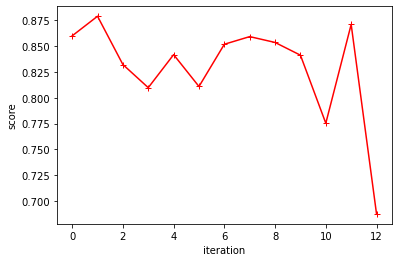

In [58]:
alpha_modle2 = []
score = []
for ccp in ccp_alpha:
    alp_model  = DecisionTreeClassifier(ccp_alpha=ccp)
    alp_model.fit(X11,y11)
    alpha_modle2.append(alp_model)
    score.append(alp_model.score(x11_test, y11_test))

plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')
    

In [59]:
train_score = [i.score(X11,y11) for i in alpha_modle2]


In [60]:
test_score = [i.score(x11_test ,y11_test) for i in alpha_modle2]

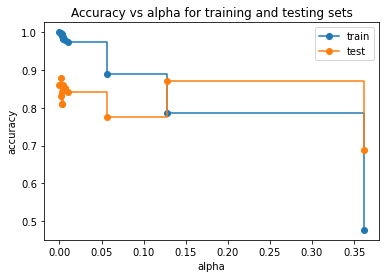

In [61]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [62]:
alpha_modle2_ccp = DecisionTreeClassifier(ccp_alpha=0.14)

In [96]:
alpha_modle2_ccp.fit(x11_train,y11_train)

DecisionTreeClassifier(ccp_alpha=0.14)

[Text(558.0, 815.4000000000001, 'X[2] <= 0.543\ngini = 0.477\nsamples = 60102\nvalue = [13125, 3963, 41187, 1827]'),
 Text(279.0, 271.79999999999995, 'gini = 0.016\nsamples = 41487\nvalue = [317, 7, 41148, 15]'),
 Text(837.0, 271.79999999999995, 'gini = 0.472\nsamples = 18615\nvalue = [12808, 3956, 39, 1812]')]

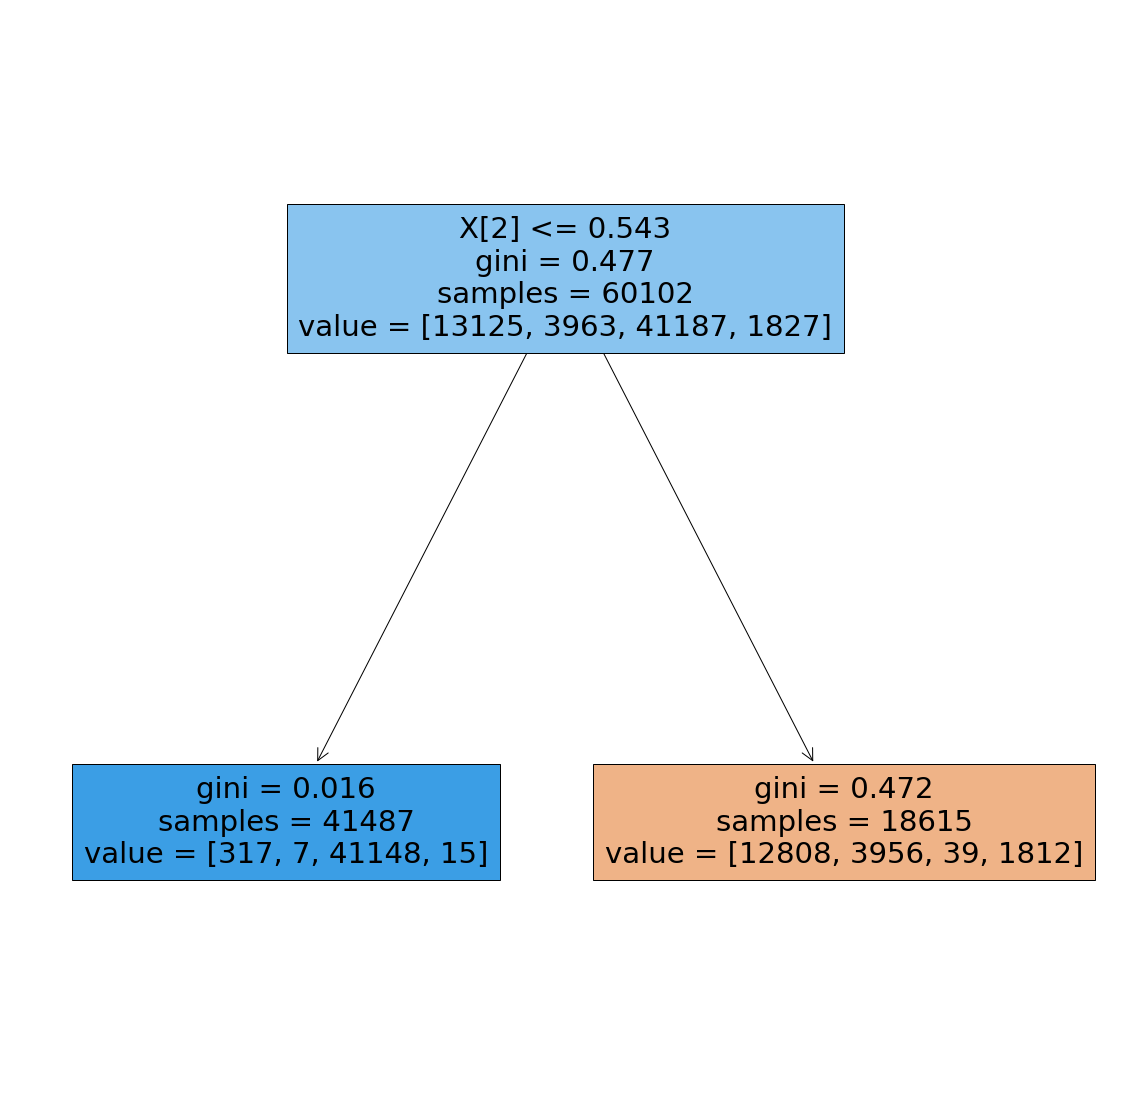

In [97]:
plt.figure(figsize=(20,20))
tree.plot_tree(alpha_modle2_ccp,filled=True)

In [98]:
alpha_modle2_ccp.score(x11_train,y11_train)

0.8977405078034009

In [99]:
alpha_modle2_ccp.score(x11_test,y11_test)

0.9000399307866365

In [73]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [85]:
grid_param = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,20,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1),
             'ccp_alpha':np.random.rand(20)
             }

In [86]:
grid_ccp = GridSearchCV(estimator=alpha_modle2_ccp,param_grid=grid_param , cv = 10 , n_jobs=-1)

In [87]:
grid_ccp.fit(X11,y11)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(ccp_alpha=0.14), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.64961136, 0.28252974, 0.16973245, 0.25744677, 0.49494424,
       0.58083973, 0.91650113, 0.02481611, 0.64063772, 0.77615317,
       0.41422311, 0.04616673, 0.80678069, 0.06106336, 0.75057634,
       0.8658076 , 0.33649639, 0.43565771, 0.60192051, 0.1880732 ]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [88]:
grid_ccp.best_params_

{'ccp_alpha': 0.04616673065653554,
 'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [90]:
model2_cpp_new = DecisionTreeClassifier(criterion='entropy' , max_depth=8 ,min_samples_leaf=4 , min_samples_split=2 , splitter='random',ccp_alpha=0.046)

In [93]:
model2_cpp_new.fit(x11_train,y11_train)

DecisionTreeClassifier(ccp_alpha=0.046, criterion='entropy', max_depth=8,
                       min_samples_leaf=4, splitter='random')

In [106]:
model2_cpp_new.score(X11,y11)

0.8433333333333334

In [107]:
model2_cpp_new.score(x11_test,y11_test)

0.9096233195793957

In [108]:
pred_train = model2_cpp_new.predict(x11_train)

In [109]:
confusion_matrix(y11_train,pred_train)

array([[11760,  1178,   187,     0],
       [ 2203,  1760,     0,     0],
       [    6,    25, 41156,     0],
       [ 1762,    59,     6,     0]], dtype=int64)

In [110]:
pred_test = model2_cpp_new.predict(x11_test)

In [111]:
confusion_matrix(y11_test,pred_test)

array([[ 2924,   306,    51,     0],
       [  528,   420,     0,     0],
       [    1,     8, 10324,     0],
       [  445,    17,     2,     0]], dtype=int64)